In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy

# global settings
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
X, y = datasets.make_circles(n_samples=2000, noise=0.001)

In [3]:
X

array([[ 0.7864946 , -0.14902008],
       [ 0.98624637, -0.16329112],
       [ 0.87122313, -0.49445811],
       ...,
       [-0.798518  , -0.04550498],
       [-0.94001456, -0.33823958],
       [-0.98356105,  0.17656042]])

In [4]:
# make a dataset with the data obtained
circles = {
    "X0":X[:, 0],
    "X1":X[:, 1],
    "label": y
}
circles_df = pd.DataFrame(circles)

In [5]:
circles_df

,X0,X1,label
0,0.786495,-0.149020,1
1,0.986246,-0.163291,0
2,0.871223,-0.494458,0
3,-0.462127,-0.653489,1
4,0.241722,0.969724,0
...,...,...,...
1995,0.752943,0.276395,1
1996,0.354420,0.934864,0
1997,-0.798518,-0.045505,1
1998,-0.940015,-0.338240,0


<Axes: xlabel='X0', ylabel='X1'>

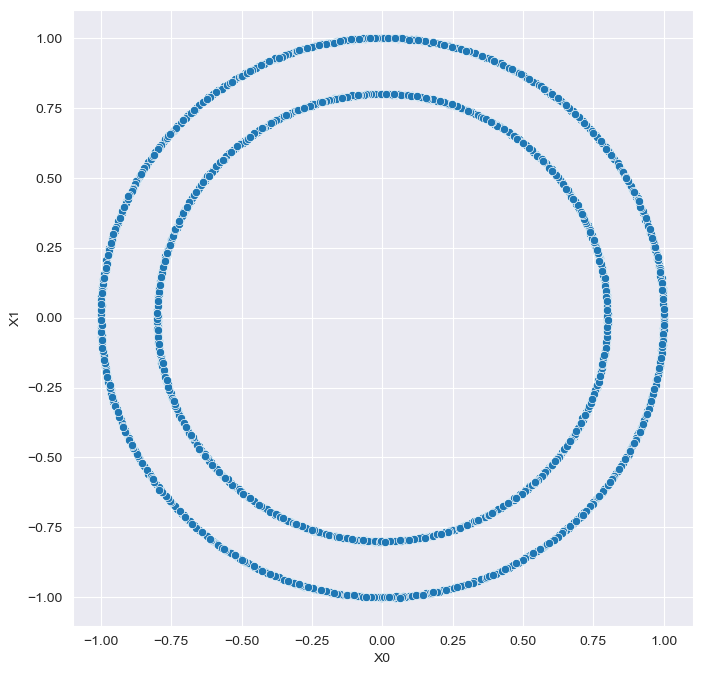

In [6]:
# Visualizing the data
plt.figure(figsize=(8,8))
sns.scatterplot(data=circles_df, x='X0', y='X1')

<Axes: xlabel='X0', ylabel='X1'>

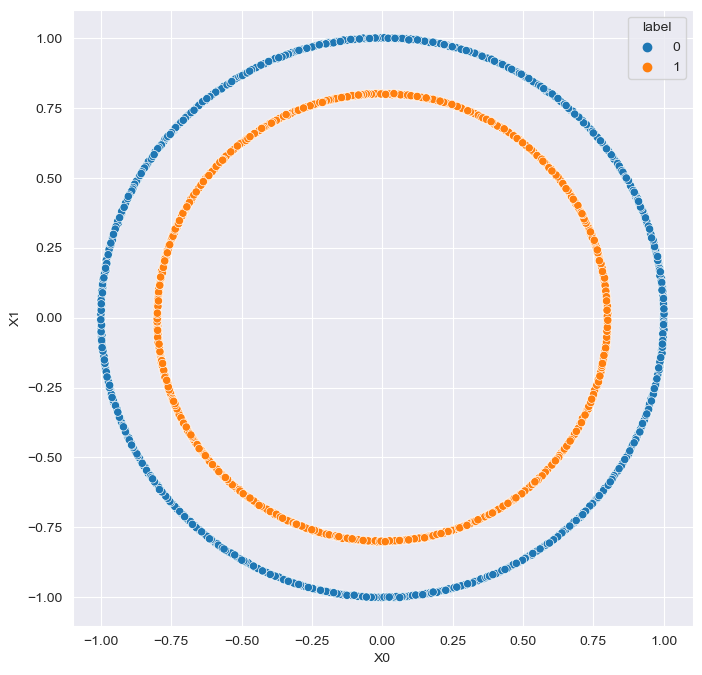

In [7]:
# using the label as hue for the circle
# Visualizing the data
plt.figure(figsize=(8,8))
sns.scatterplot(data=circles_df, x='X0', y='X1', hue='label')

In [8]:
X[0]

array([ 0.7864946 , -0.14902008])

In [9]:
# splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# building classification models to predict the labels of points given

In [37]:
# create the sequential model

# set random seed
tf.random.set_seed(42)

model_1 = Sequential([
    Input(shape=X[0].shape),
    Dense(1, name='hidden_layer')
], name='model_1')

# compile the model
model_1.compile(
    loss=BinaryCrossentropy,
    optimizer=SGD(),
    metrics=['accuracy']
)

history = model_1.fit(X_train,y_train, batch_size=50, validation_split=0.15, epochs=100, verbose=0)
# get model summary
model_1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [39]:
# evaluate the model on the test dataset
model_1.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4888 - loss: 0.6940


[0.6940585374832153, 0.4975000023841858]

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

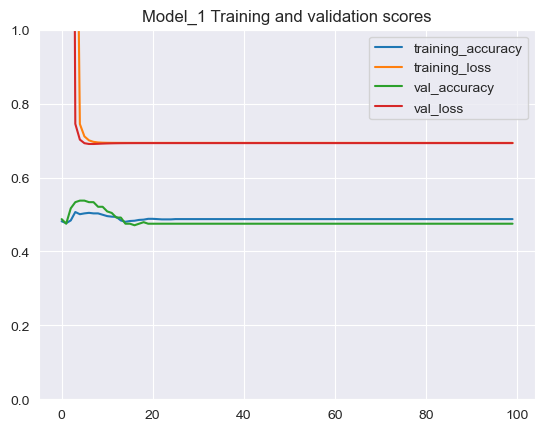

In [67]:
# looks like our model is not performing well at all.
# Plot the model's training loss and accuracy
hist = pd.DataFrame(history.history)
plt.plot(hist['accuracy'], label='training_accuracy')
plt.plot(hist['loss'], label='training_loss')
plt.plot(hist['val_accuracy'], label='val_accuracy')
plt.plot(hist['val_loss'], label='val_loss')
plt.ylim(0,1)
plt.title("Model_1 Training and validation scores")
plt.legend()

## create model 2 be an improvement of model 1
1 layer with sigmoid activation function

In [77]:
tf.random.set_seed(42)

# 1. create the model
model_2 = Sequential([
    Input(shape=X[0].shape),
    Dense(1, activation='sigmoid', name='hidden_layer')
], name='model_2')

# 2. Compile the model
model_2.compile(
    loss=BinaryCrossentropy,
    optimizer=Adam(),
    metrics=['accuracy']
)

# 3. fit the model
history = model_2.fit(X_train, y_train, validation_split=0.15, verbose=0, epochs=100, batch_size=32)

# get the summary of the model
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [78]:
# Evaluate the model on the test set
model_2.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4696 - loss: 0.6939 


[0.6936724185943604, 0.48500001430511475]

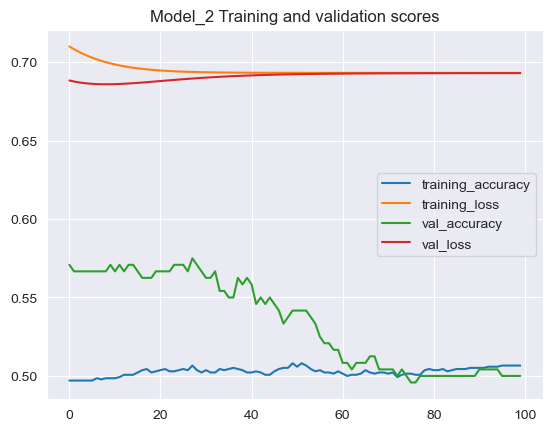

In [85]:
# visualize model training and validation loss and accuracy
hist = pd.DataFrame(history.history)
plt.plot(hist['accuracy'], label='training_accuracy')
plt.plot(hist['loss'], label='training_loss')
plt.plot(hist['val_accuracy'], label='val_accuracy')
plt.plot(hist['val_loss'], label='val_loss')
plt.title("Model_2 Training and validation scores")
plt.legend()

## Model 3
Improvement on model 2
3 hidden layers
50 neurons, 30 neurons and 1 neuron

Change learning rate and maintain training time

In [89]:
# set a random seed
tf.random.set_seed(42)

# build the model
model_3 = Sequential([
    Input(shape=X[0].shape),
    Dense(50, activation='relu', name='hidden_layer_1'),
    Dense(30, activation='relu', name='hidden_layer_2'),
    Dense(1, activation='sigmoid', name='output_layer')
], name='model_3')

# compile the model
model_3.compile(
    loss=BinaryCrossentropy,
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# fit the model and get the history callback
history = model_3.fit(X_train, y_train, epochs=100, verbose=0, batch_size=32, validation_split=0.15)

# get the summary of the model
model_3.summary()

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,135 (20.06 KB)

 Trainable params: 1,711 (6.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,424 (13.38 KB)

In [91]:
# evaluate the model on the test set
model_3.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 4.1838e-06 


[4.201561750960536e-06, 1.0]

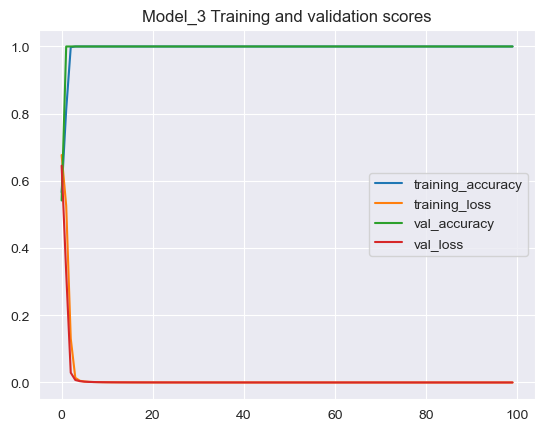

In [93]:
# plot the model's training and validation loss and accuracy
hist = pd.DataFrame(history.history)
plt.plot(hist['accuracy'], label='training_accuracy')
plt.plot(hist['loss'], label='training_loss')
plt.plot(hist['val_accuracy'], label='val_accuracy')
plt.plot(hist['val_loss'], label='val_loss')
plt.title("Model_3 Training and validation scores")
plt.legend()

In [103]:
# make some predictions with model_3
model_3.predict(tf.constant([[0.786495,-0.149020]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


array([[0.99999636]], dtype=float32)

In [105]:
tf.constant([[0.786495,-0.149020]]).shape

TensorShape([1, 2])